In [2]:
import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

final_df = pd.read_csv("data/final/final_merge.csv")

In [3]:
final_df

,country,year,dystopia_residual,family,freedom,gdp_hr,generosity,health,score,trust,...,SABER: (Workforce Development) Policy Goal 3 Lever 1: Enabling Diversity and Excellence in Training Provision,SABER: (Workforce Development) Policy Goal 3 Lever 2: Fostering Relevance in Public Training Programs,SABER: (Workforce Development) Policy Goal 3 Lever 3: Enhancing Evidence-based Accountability for Results,SABER: (Workforce Development) Policy Goal 3: Service Delivery,Government expenditure in educational institutions as % of GDP (%),Government expenditure in secondary institutions education as % of GDP (%),Government expenditure in tertiary institutions as % of GDP (%),Government expenditure on secondary education as % of GDP (%),Government expenditure on tertiary education as % of GDP (%),"Percentage of students in post-secondary non-tertiary education enrolled in general programmes, both sexes (%)"
0,AFG,2015,1.952100,0.302850,0.23414,0.319820,0.365100,0.303350,3.575,0.097190,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,2016,2.145580,0.110370,0.16430,0.382270,0.312680,0.173440,3.360,0.071120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,2017,2.150801,0.581543,0.10618,0.401477,0.311871,0.180747,3.794,0.061158,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,2018,2.150801,0.537000,0.08500,0.332000,0.191000,0.255000,3.632,0.036000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,2019,2.150801,0.517000,0.00000,0.350000,0.158000,0.361000,3.203,0.025000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732,XKX,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1733,XKX,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1734,XKX,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1735,XKX,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Show missing values

In [ ]:
plt.figure(figsize=(30,18))
sns.color_palette("Greys")
sns.heatmap(final_df.isna().transpose(),
            cmap="Greys_r", yticklabels=False, xticklabels=False,
            cbar_kws={'label': 'Missing Data'})
plt.savefig("missing_values.png", dpi=100, orientation="landscape",bbox_inches="tight")
#missing = final_df.isna().sum(axis=0)
#missing[missing > 1564] #columns that are missing more than 90% of their values

In [ ]:
missing_values = final_df.isnull().sum() / len(final_df)
missing_values.sort_values(ascending=False, inplace=True)
missing_values

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index

sns.set(style="whitegrid")
plot = sns.barplot(x = 'Name', y = 'count', data=missing_values)
plot.set(xticklabels=[])
plt.savefig("missing_values_bar.png", dpi=100, orientation="landscape",bbox_inches="tight")
plt.show()

## Show correlation between happiness and other features

In [3]:
# columns missing 90% of data
missing = final_df.isna().sum(axis=0) 
columns = missing[missing > 1564].keys() #columns that are missing more than 90% of their values
filtered_df = final_df.drop(columns.tolist(),axis=1)

In [4]:
# rows missing 90% of data
missing = filtered_df.isna().sum(axis=1) 
rows = missing[missing > 514].keys().tolist()
filtered_df = filtered_df.drop(rows,axis=0)
data= filtered_df

No handles with labels found to put in legend.


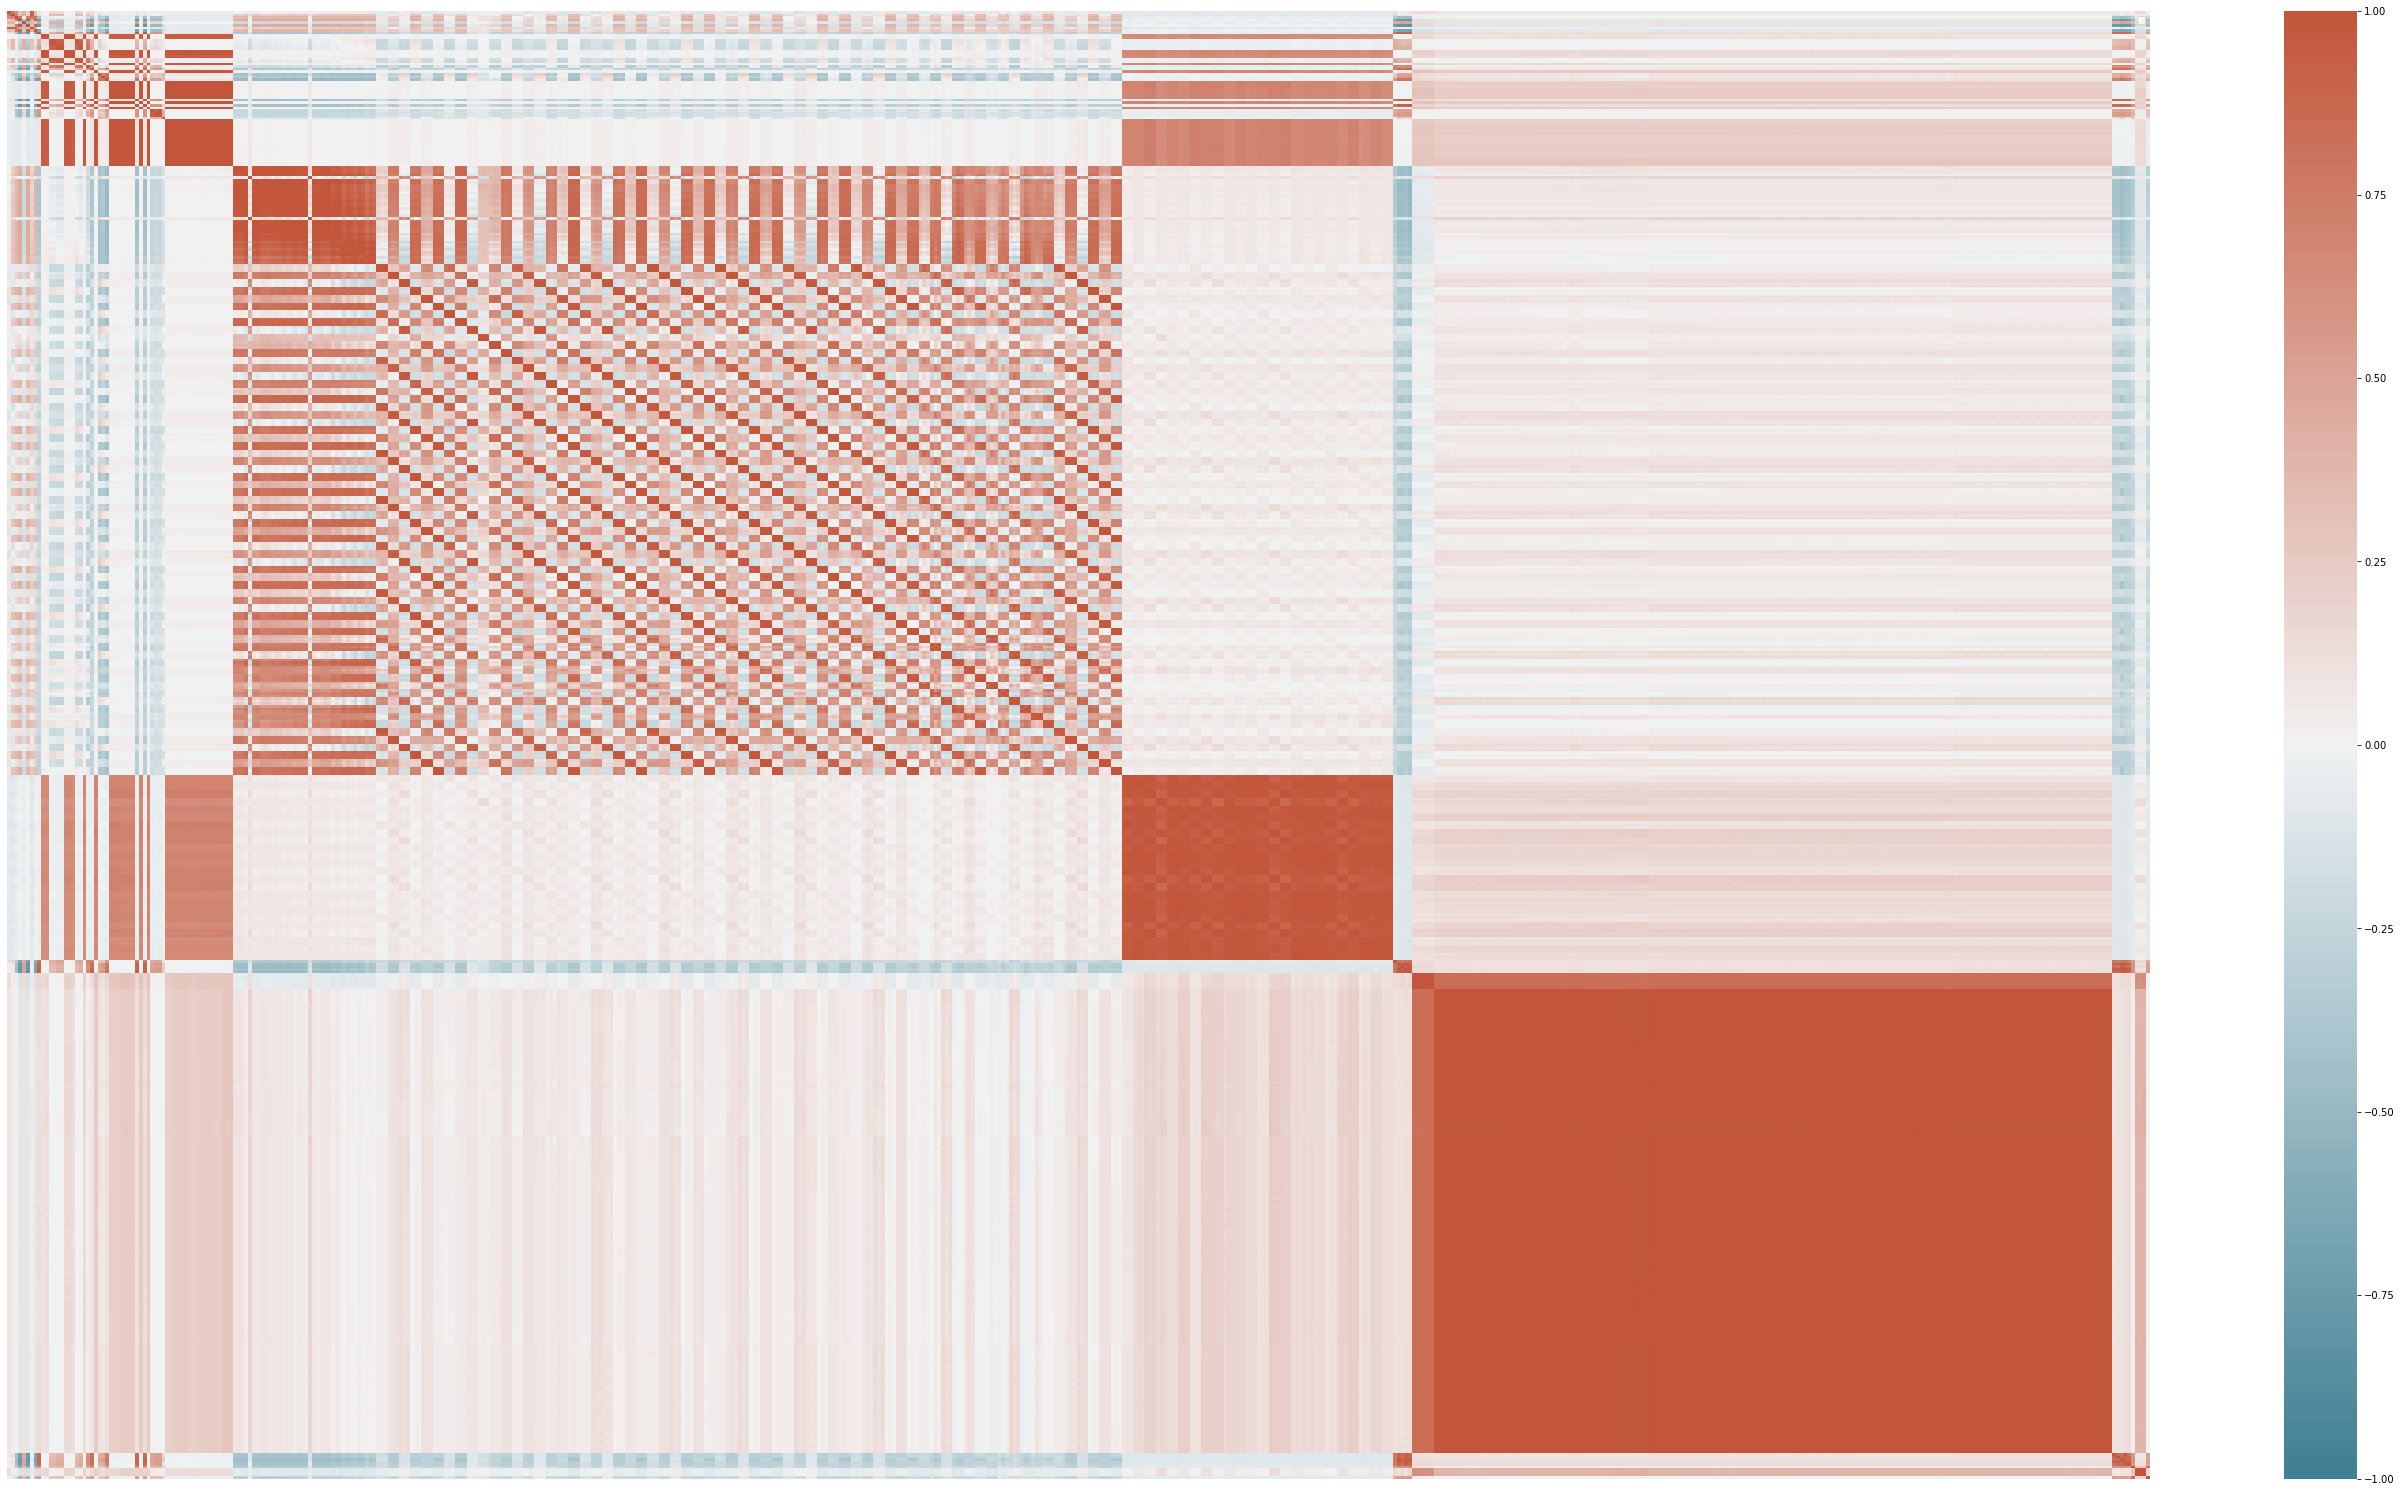

In [17]:
plt.figure(figsize=(48, 27))
palette = sns.diverging_palette(20, 220, n=200)
palette.reverse()
data = filtered_df.drop(["country","year"],axis=1)
data = data.fillna(0).corr()

plt.legend(loc='upper right')

sns.heatmap(data, 
            cmap=palette, 
            yticklabels=False, 
            xticklabels=False, 
            vmin=-1, vmax=1)

plt.savefig("heatmap.png", dpi=100, orientation="landscape",bbox_inches="tight")
plt.show()

In [ ]:
filtered = pd.DataFrame(data.loc[(data["score"] > 0.3) | (data["score"] < -0.3)].score).sort_values(by="score",ascending=False)

In [ ]:
filtered.style.background_gradient(cmap='Reds',axis=0)

In [ ]:
dfi.export(filtered.style.background_gradient(cmap='Reds',axis=0), 'df_styled.png')

In [ ]:
final_df.groupby("region")